In [ ]:
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

repo_root = Path.cwd().resolve()
for _ in range(10):
    if (repo_root / 'src').exists() and (repo_root / 'paper2').exists():
        break
    repo_root = repo_root.parent

out_csv = repo_root / 'paper2' / 'data' / 'bell_correlation.csv'
out_csv.parent.mkdir(parents=True, exist_ok=True)
out_csv

WindowsPath('C:/workspace/Physics/X-theta-framework/paper2/data/bell_correlation.csv')

In [ ]:
# Correlation curves
deltas = np.linspace(0.0, np.pi, 361)
E_quantum = -np.cos(deltas)

# Simple LHV-ish deterministic sign model baseline via Monte Carlo over λ ~ U[0,2π)
rng = np.random.default_rng(0)
N = 200000
lam = rng.uniform(0.0, 2.0*np.pi, size=N)

def outcome(setting, lam):
    return np.sign(np.cos(setting - lam))

E_lhv = []
for d in deltas:
    a = 0.0
    b = d
    A = outcome(a, lam)
    B = outcome(b, lam + np.pi)  # anti-correlated hidden variable
    E_lhv.append(float(np.mean(A * B)))
E_lhv = np.array(E_lhv)

df = pd.DataFrame({
    'delta': deltas,
    'E_quantum': E_quantum,
    'E_lhv': E_lhv,
})
df.to_csv(out_csv, index=False)
print('Wrote:', out_csv)
df.head()

Wrote: C:\workspace\Physics\X-theta-framework\paper2\data\bell_correlation.csv


,delta,E_quantum,E_lhv
0,0.000000,-1.000000,-1.00000
1,0.008727,-0.999962,-0.99464
2,0.017453,-0.999848,-0.98899
3,0.026180,-0.999657,-0.98366
4,0.034907,-0.999391,-0.97820


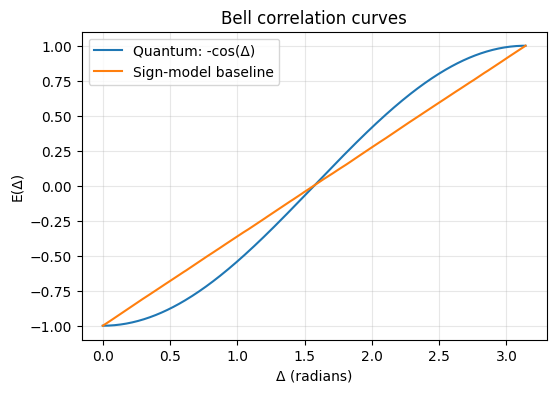

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(df['delta'], df['E_quantum'], label='Quantum: -cos(Δ)')
plt.plot(df['delta'], df['E_lhv'], label='Sign-model baseline')
plt.xlabel('Δ (radians)')
plt.ylabel('E(Δ)')
plt.title('Bell correlation curves')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()